## Preprocessing

### Load Data

In [2]:
import pandas as pd

species = pd.read_csv("/net/home/swolf/iNaturalist/Data/sPlotOpen/sPlotOpen_DT(1).txt", sep = "\t")

In [3]:
species

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778
1,16,Potentilla elegans,Potentilla elegans,25.0,CoverPerc,0.694444
2,16,Saxifraga serpyllifolia,Saxifraga serpyllifolia,1.0,CoverPerc,0.027778
3,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462
4,17,Potentilla elegans,Potentilla elegans,25.0,CoverPerc,0.961538
...,...,...,...,...,...,...
1945379,1126790,Potentilla erecta,Potentilla erecta,0.3,CoverPerc,0.006276
1945380,1126790,Salix lapponum,Salix lapponum,1.0,CoverPerc,0.020921
1945381,1126790,Stellaria palustris,Stellaria palustris,0.5,CoverPerc,0.010460
1945382,1126790,Trichophorum alpinum,Scirpus hudsonianus,18.0,CoverPerc,0.376569


### Link to TRY

In [23]:
TRYdata = pd.read_csv("/net/scratch/swolf/GDVM/TRY_gdvm/23608.txt", sep = "\t", encoding="iso-8859-1",
                     usecols = ["AccSpeciesName", "SpeciesName", "TraitID", "TraitName", "OriglName", 
                                "OrigValueStr", "StdValue"],
                     dtype={'TraitID': float})

/tmp/ipykernel_804902/318716754.py:1: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  TRYdata = pd.read_csv("/net/scratch/swolf/TRY_gdvm/23608.txt", sep = "\t", encoding="iso-8859-1",


In [24]:
TRYdata.head()

,SpeciesName,AccSpeciesName,TraitID,TraitName,OriglName,OrigValueStr,StdValue
0,Abelia × grandiflora (A. chinesis × A. uniflora),Abelia grandiflora_x,37.0,Leaf phenology type,Evergreen,Y,NaN
1,Abelia × grandiflora (A. chinesis × A. uniflora),Abelia grandiflora_x,NaN,NaN,Gymnosperm,N,NaN
2,Abies alba,Abies alba,37.0,Leaf phenology type,Evergreen,Y,NaN
3,Abies alba,Abies alba,NaN,NaN,Gymnosperm,Y,NaN
4,Abies amabilis,Abies amabilis,37.0,Leaf phenology type,Evergreen,Y,NaN


In [32]:
TRYdata = TRYdata.dropna(subset=['StdValue'], how='all')

In [33]:
TRYdata.head()

,SpeciesName,AccSpeciesName,TraitID,TraitName,OriglName,OrigValueStr,StdValue,Species
1693,Acer platanoides,Acer platanoides,3115.0,Leaf area per leaf dry mass (specific leaf are...,SLA,24.7280784313725,24.728078,Acer platanoides
1699,Acer platanoides,Acer platanoides,3115.0,Leaf area per leaf dry mass (specific leaf are...,SLA,20.9242857142857,20.924286,Acer platanoides
1705,Acer platanoides,Acer platanoides,3115.0,Leaf area per leaf dry mass (specific leaf are...,SLA,16.6194584139265,16.619458,Acer platanoides
1711,Acer platanoides,Acer platanoides,3115.0,Leaf area per leaf dry mass (specific leaf are...,SLA,15.0088253968254,15.008825,Acer platanoides
1717,Acer platanoides,Acer platanoides,3115.0,Leaf area per leaf dry mass (specific leaf are...,SLA,20.9287234042553,20.928723,Acer platanoides


In [34]:
TRYdata["TraitName"].unique()

array(['Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole excluded',
       'Plant height vegetative', 'Leaf lifespan (longevity)',
       'Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole included',
       'Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded',
       'Photosynthesis carboxylation capacity (Vcmax) per leaf area (Farquhar model)',
       'Plant lifespan (longevity)', 'Root rooting depth',
       'Photosynthesis electron transport capacity (Jmax) per leaf area (Farquhar model)',
       'Root length per root dry mass (specific root length, SRL)'],
      dtype=object)

In [28]:
# shorten for species name
TRYdata['Species'] = TRYdata['AccSpeciesName'].str.lower()
TRYdata['Species'] = TRYdata['Species'].str.capitalize()
TRYdata['Species'] = TRYdata['Species'].astype(str)
TRYdata['Species']  = TRYdata['Species'].apply(lambda x: ' '.join(x.split()[0:2]))

In [35]:
import numpy as np

grouped = TRYdata.groupby(['Species', 'TraitName'])
TRYsummary = grouped['StdValue'].agg([np.mean]).reset_index()

#check output
TRYsummary

,Species,TraitName,mean
0,Aa sp,Leaf area per leaf dry mass (specific leaf are...,9.433962
1,Abacaba palm,Plant height vegetative,15.000000
2,Abarema adenophora,Leaf area per leaf dry mass (specific leaf are...,10.630000
3,Abarema adenophora,Leaf area per leaf dry mass (specific leaf are...,11.820481
4,Abarema brachystachya,Photosynthesis electron transport capacity (Jm...,73.800000
...,...,...,...
69586,Zygophyllum xanthoxylon,Leaf area per leaf dry mass (specific leaf are...,7.710615
69587,Zygophyllum xanthoxylon,Leaf area per leaf dry mass (specific leaf are...,5.965349
69588,Zygophyllum xanthoxylum,Leaf area per leaf dry mass (specific leaf are...,5.151229
69589,Zygophyllum xanthoxylum,Plant height vegetative,1.000000


In [49]:
TRYsummary.shape

(69591, 3)

In [42]:
TRYsummary.to_csv("/net/scratch/swolf/GDVM/TRY_gdvm/species_means.csv", index=False)

In [50]:
TRY = pd.read_csv("/net/scratch/swolf/GDVM/TRY_gdvm/species_means.csv")


In [63]:
TRY.head()

,Species,TraitName,mean
0,Aa sp,Leaf area per leaf dry mass (specific leaf are...,9.433962
1,Abacaba palm,Plant height vegetative,15.000000
2,Abarema adenophora,Leaf area per leaf dry mass (specific leaf are...,10.630000
3,Abarema adenophora,Leaf area per leaf dry mass (specific leaf are...,11.820481
4,Abarema brachystachya,Photosynthesis electron transport capacity (Jm...,73.800000


In [64]:
# change df shape
TRY = TRY.pivot(index=["Species"], columns="TraitName", values="mean")

# reset indeces (species name) as columns in data frame
TRY.reset_index(inplace=True)

In [66]:
TRY.head()

TraitName,Species,"Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole excluded","Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole included","Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded",Leaf lifespan (longevity),Photosynthesis carboxylation capacity (Vcmax) per leaf area (Farquhar model),Photosynthesis electron transport capacity (Jmax) per leaf area (Farquhar model),Plant height vegetative,Plant lifespan (longevity),"Root length per root dry mass (specific root length, SRL)",Root rooting depth
0,Aa sp,NaN,NaN,9.433962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abacaba palm,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN
2,Abarema adenophora,NaN,10.63,11.820481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abarema brachystachya,NaN,NaN,NaN,NaN,NaN,73.8,10.000000,NaN,NaN,NaN
4,Abarema jupunba,14.729637,NaN,15.984682,NaN,NaN,NaN,25.142857,NaN,NaN,NaN


In [65]:
TRY.shape

(34735, 11)

In [67]:
sPlot_TRY_1 = pd.merge(species, TRY,
                    left_on= ['Species'],
                    right_on= ['Species'],
                    how='inner')

In [68]:
sPlot_TRY_1.head()

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover,"Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole excluded","Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole included","Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded",Leaf lifespan (longevity),Photosynthesis carboxylation capacity (Vcmax) per leaf area (Farquhar model),Photosynthesis electron transport capacity (Jmax) per leaf area (Farquhar model),Plant height vegetative,Plant lifespan (longevity),"Root length per root dry mass (specific root length, SRL)",Root rooting depth
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN
1,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN
2,18,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.047619,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN
3,713,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.011173,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN
4,714,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.005495,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN


In [69]:
sPlot_TRY_1['PlotObservationID'].nunique()

93666

In [70]:
sPlot_TRY_1['Species'].isnull().values.any()

False

In [75]:
sPlot_TRY_1.shape

(1371823, 16)

In [72]:
not_merged = species[~species.index.isin(sPlot_TRY_1.index)]  # Select rows not merged from species


In [74]:
not_merged

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover
1371823,403590,Eriophorum angustifolium,Eriophorum angustifolium,2.0,CoverPerc,0.007663
1371824,403590,Festuca nigrescens,Festuca nigrescens,2.0,CoverPerc,0.007663
1371825,403590,Festuca pratensis,Festuca pratensis subsp. pratensis,2.0,CoverPerc,0.007663
1371826,403590,Festuca rubra,Festuca rubra,13.0,CoverPerc,0.049808
1371827,403590,Filipendula ulmaria,Filipendula ulmaria,2.0,CoverPerc,0.007663
...,...,...,...,...,...,...
1945379,1126790,Potentilla erecta,Potentilla erecta,0.3,CoverPerc,0.006276
1945380,1126790,Salix lapponum,Salix lapponum,1.0,CoverPerc,0.020921
1945381,1126790,Stellaria palustris,Stellaria palustris,0.5,CoverPerc,0.010460
1945382,1126790,Trichophorum alpinum,Scirpus hudsonianus,18.0,CoverPerc,0.376569


In [94]:
not_merged.drop('Species', axis=1, inplace=True)

sPlot_TRY_2 = pd.merge(not_merged, TRY, left_on= ['Original_species'],
                    right_on= ['Species'] , how='inner')  # Merge based on 'Original_species'


/tmp/ipykernel_804902/567552158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_merged.drop('Species', axis=1, inplace=True)


In [95]:
sPlot_TRY = pd.concat([sPlot_TRY_1, sPlot_TRY_2])  # Combine the two merged DataFrames


In [96]:
sPlot_TRY

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover,"Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole excluded","Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole included","Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded",Leaf lifespan (longevity),Photosynthesis carboxylation capacity (Vcmax) per leaf area (Farquhar model),Photosynthesis electron transport capacity (Jmax) per leaf area (Farquhar model),Plant height vegetative,Plant lifespan (longevity),"Root length per root dry mass (specific root length, SRL)",Root rooting depth
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN
1,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN
2,18,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.047619,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN
3,713,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.011173,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN
4,714,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.005495,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474792,1108143,Vitis vulpina,Vitis vulpina,2.0,CoverPerc,0.009804,NaN,NaN,15.303945,NaN,NaN,NaN,20.127886,5.0,NaN,2.878667
474793,1109568,Festuca puccinellii,Festuca puccinellii,3.0,CoverPerc,0.040541,NaN,NaN,NaN,NaN,NaN,NaN,0.125000,NaN,NaN,NaN
474794,1110122,Erucastrum virgatum,Erucastrum virgatum,13.0,CoverPerc,0.240741,NaN,NaN,6.828000,NaN,NaN,NaN,0.552500,NaN,NaN,0.154000
474795,1110136,Erucastrum virgatum,Erucastrum virgatum,13.0,CoverPerc,0.183099,NaN,NaN,6.828000,NaN,NaN,NaN,0.552500,NaN,NaN,0.154000


In [97]:
sPlot_TRY.shape[0]/species.shape[0]

0.9492316169969528

In [98]:
sPlot_TRY['PlotObservationID'].nunique()

93666

In [99]:
species['PlotObservationID'].nunique()

95104

In [100]:
import numpy as np 

sPlot_TRY.replace(0, np.nan, inplace=True)

In [101]:
0.0 in sPlot_TRY['Relative_cover'].unique() 

False

In [102]:
sPlot_TRY.duplicated().sum()

468554

In [103]:
sPlot_TRY.drop_duplicates(keep='first', inplace=True)

In [104]:
sPlot_TRY.shape[0]/species.shape[0]

0.7083773691980606

### Add locations

In [105]:
sPlot = pd.read_csv("/net/home/swolf/iNaturalist/Data/sPlotOpen/sPlotOpen_header(2).txt", sep= "\t")

/tmp/ipykernel_804902/3013501701.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  sPlot = pd.read_csv("/net/home/swolf/iNaturalist/Data/sPlotOpen/sPlotOpen_header(2).txt", sep= "\t")


In [106]:
sPlot.columns

Index(['PlotObservationID', 'GIVD_ID', 'Dataset', 'Continent', 'Country',
       'Biome', 'Date_of_recording', 'Latitude', 'Longitude',
       'Location_uncertainty', 'Releve_area', 'Plant_recorded', 'Elevation',
       'Aspect', 'Slope', 'is_forest', 'ESY', 'Naturalness', 'Forest',
       'Shrubland', 'Grassland', 'Wetland', 'Sparse_vegetation', 'Cover_total',
       'Cover_tree_layer', 'Cover_shrub_layer', 'Cover_herb_layer',
       'Cover_moss_layer', 'Cover_lichen_layer', 'Cover_algae_layer',
       'Cover_litter_layer', 'Cover_bare_rocks', 'Cover_cryptogams',
       'Cover_bare_soil', 'Height_trees_highest', 'Height_trees_lowest',
       'Height_shrubs_highest', 'Height_shrubs_lowest', 'Height_herbs_average',
       'Height_herbs_lowest', 'Height_herbs_highest', 'SoilClim_PC1',
       'SoilClim_PC2', 'Resample_1', 'Resample_2', 'Resample_3',
       'Resample_1_consensus'],
      dtype='object')

'Releve_area' is the area of the sampling plot in m2.

In [107]:
loc = sPlot[['PlotObservationID', 'Releve_area', 'Latitude', 'Longitude']]

In [108]:
loc

,PlotObservationID,Releve_area,Latitude,Longitude
0,16,NaN,62.420000,-154.180000
1,17,NaN,62.420000,-154.180000
2,18,NaN,62.420000,-154.180000
3,20,NaN,62.420000,-154.180000
4,22,NaN,62.420000,-154.180000
...,...,...,...,...
95099,1126749,4.0,56.287870,27.273862
95100,1126761,4.0,56.939965,23.598014
95101,1126769,4.0,56.939965,23.598014
95102,1126774,4.0,57.248222,22.147667


In [110]:
sPlot_TRY = pd.merge(sPlot_TRY, loc, 
                    left_on= ['PlotObservationID'],
                    right_on= ['PlotObservationID'], 
                    how='inner')
sPlot_TRY

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover,"Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole excluded","Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole included","Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded",Leaf lifespan (longevity),Photosynthesis carboxylation capacity (Vcmax) per leaf area (Farquhar model),Photosynthesis electron transport capacity (Jmax) per leaf area (Farquhar model),Plant height vegetative,Plant lifespan (longevity),"Root length per root dry mass (specific root length, SRL)",Root rooting depth,Releve_area,Latitude,Longitude
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,NaN,62.420000,-154.180000
1,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,NaN,62.420000,-154.180000
2,18,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.047619,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,NaN,62.420000,-154.180000
3,713,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.011173,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,100.0,69.851405,-156.016865
4,713,Cassiope tetragona,Cassiope tetragona [s. tetragona],8.0,CoverPerc,0.044693,6.521087,NaN,5.967457,40.187796,NaN,NaN,0.086051,74.0,NaN,0.101933,100.0,69.851405,-156.016865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378061,998942,Nymphoides peltata,Nymphoides peltata,80.0,CoverPerc,1.000000,25.600000,NaN,24.286000,1.000000,NaN,NaN,0.889000,NaN,NaN,NaN,4.0,45.791222,47.298194
1378062,999149,Nymphoides peltata,Nymphoides peltata,99.0,CoverPerc,1.000000,25.600000,NaN,24.286000,1.000000,NaN,NaN,0.889000,NaN,NaN,NaN,4.0,46.217000,47.839667
1378063,793329,Prunus prostrata,Prunus prostrata,3.0,CoverPerc,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,0.900000,10.0,NaN,NaN,25.0,40.467500,25.587222
1378064,837415,Drypis spinosa,Drypis spinosa,13.0,CoverPerc,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,1.0,41.622436,20.662919


In [112]:
sPlot_TRY.to_csv("/net/scratch/swolf/GDVM/sPlot_gdvm/sPlotOpen_TRY23608.csv", index=False)


## Calculate community weighted mean for TRY traits

In [123]:
sPlot_TRY = pd.read_csv("/net/scratch/swolf/GDVM/sPlot_gdvm/sPlotOpen_TRY23608.csv")

In [124]:
sPlot_TRY.head()

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover,"Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole excluded","Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole included","Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded",Leaf lifespan (longevity),Photosynthesis carboxylation capacity (Vcmax) per leaf area (Farquhar model),Photosynthesis electron transport capacity (Jmax) per leaf area (Farquhar model),Plant height vegetative,Plant lifespan (longevity),"Root length per root dry mass (specific root length, SRL)",Root rooting depth,Releve_area,Latitude,Longitude
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,NaN,62.420000,-154.180000
1,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,NaN,62.420000,-154.180000
2,18,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.047619,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,NaN,62.420000,-154.180000
3,713,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.011173,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,100.0,69.851405,-156.016865
4,713,Cassiope tetragona,Cassiope tetragona [s. tetragona],8.0,CoverPerc,0.044693,6.521087,NaN,5.967457,40.187796,NaN,NaN,0.086051,74.0,NaN,0.101933,100.0,69.851405,-156.016865


In [125]:
def shorten_names(df):

    df.rename(columns = {'Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole excluded':'SLA petiole excluded'}, inplace = True)
    df.rename(columns = {'Plant height vegetative':'Plant height'}, inplace = True)
    df.rename(columns = {'Leaf lifespan (longevity)':'Leaf lifespan (longevity)'}, inplace = True)
    df.rename(columns = {'Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): petiole included':'SLA petiole included'}, inplace = True)
    df.rename(columns = {'Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded':'SLA petiole undefined'}, inplace = True)
    df.rename(columns = {'Photosynthesis carboxylation capacity (Vcmax) per leaf area (Farquhar model)':'Vcmax'}, inplace = True)
    df.rename(columns = {'Plant lifespan (longevity)':'Plant lifespan (longevity)'}, inplace = True)
    df.rename(columns = {'Root rooting depth':'Root rooting depth'}, inplace = True)
    df.rename(columns = {'Photosynthesis electron transport capacity (Jmax) per leaf area (Farquhar model)':'Jmax'}, inplace = True)
    df.rename(columns = {'Root length per root dry mass (specific root length, SRL)':'SRL'}, inplace = True)


In [126]:
shorten_names(sPlot_TRY)

In [127]:
sPlot_TRY.head()

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover,SLA petiole excluded,SLA petiole included,SLA petiole undefined,Leaf lifespan (longevity),Vcmax,Jmax,Plant height,Plant lifespan (longevity),SRL,Root rooting depth,Releve_area,Latitude,Longitude
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,NaN,62.420000,-154.180000
1,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,NaN,62.420000,-154.180000
2,18,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.047619,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,NaN,62.420000,-154.180000
3,713,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.011173,NaN,NaN,15.388572,NaN,NaN,NaN,0.064177,NaN,NaN,NaN,100.0,69.851405,-156.016865
4,713,Cassiope tetragona,Cassiope tetragona [s. tetragona],8.0,CoverPerc,0.044693,6.521087,NaN,5.967457,40.187796,NaN,NaN,0.086051,74.0,NaN,0.101933,100.0,69.851405,-156.016865


In [128]:
columns_to_check =sPlot_TRY.columns[6:-3] 
columns_with_negative_values = []

for column in columns_to_check:
    if (sPlot_TRY[column] < 0).any():
        columns_with_negative_values.append(column)

if len(columns_with_negative_values) > 0:
    print("The following columns have negative values:", columns_with_negative_values)
else:
    print("None of the columns have negative values.")

None of the columns have negative values.


Plot distributions of traits

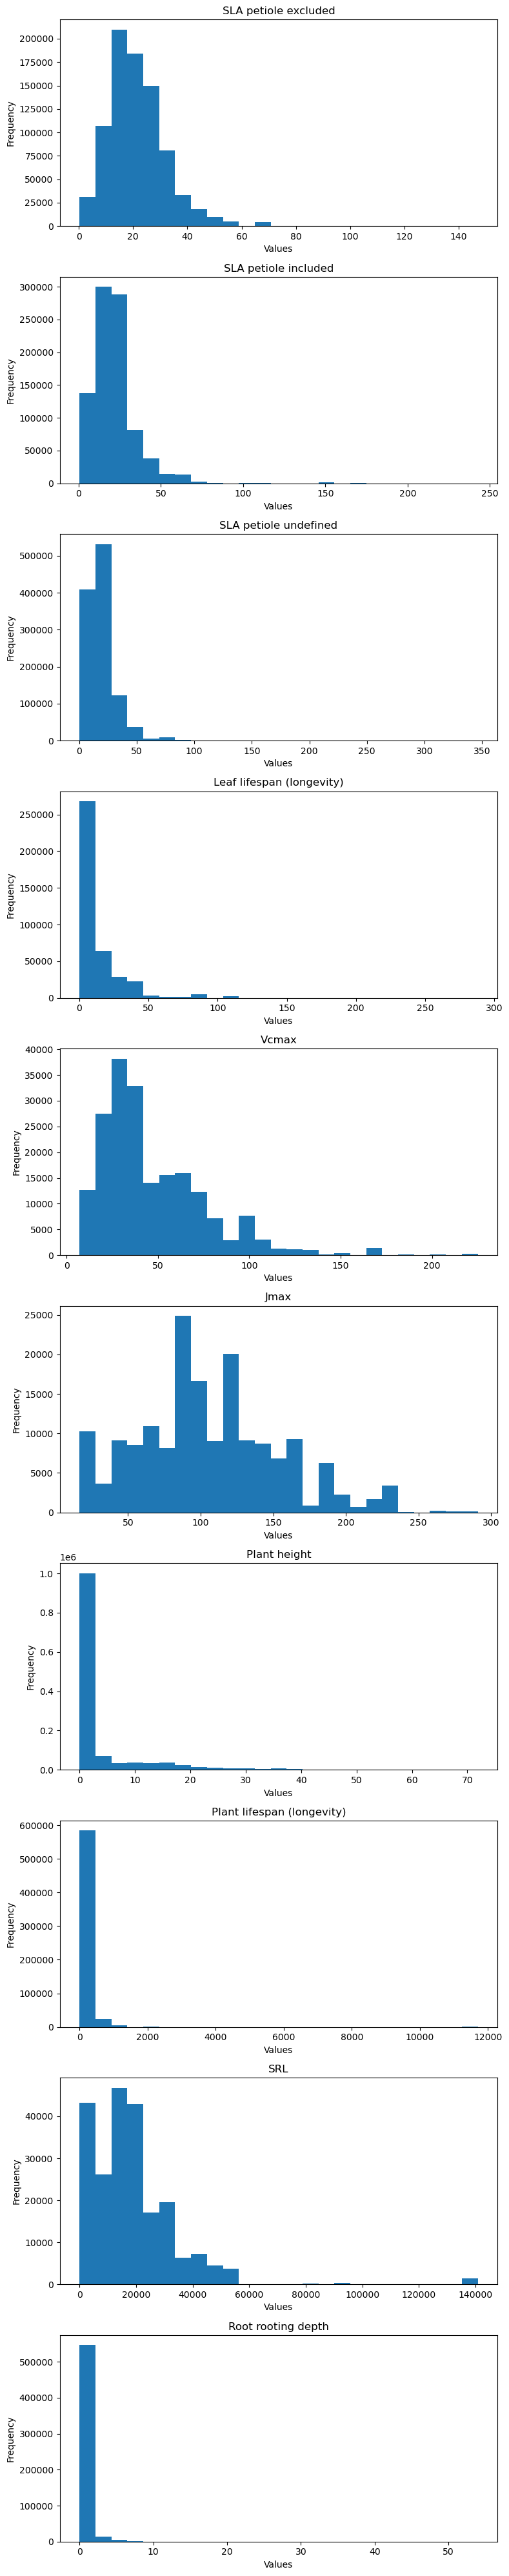

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
columns_to_plot = sPlot_TRY.columns[6:-3]  # Select columns 2-8 (0-based indexing)
num_plots = len(columns_to_plot)

fig, axs = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    sPlot_TRY[column].plot(kind='hist', ax=ax, bins=25)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [130]:
import numpy as np

# select columns without negative values:
columns_to_transform = sPlot_TRY.columns[6:-3]  # Select columns


In [131]:
sPlot_TRY[columns_to_transform] = sPlot_TRY[columns_to_transform].apply(np.log)

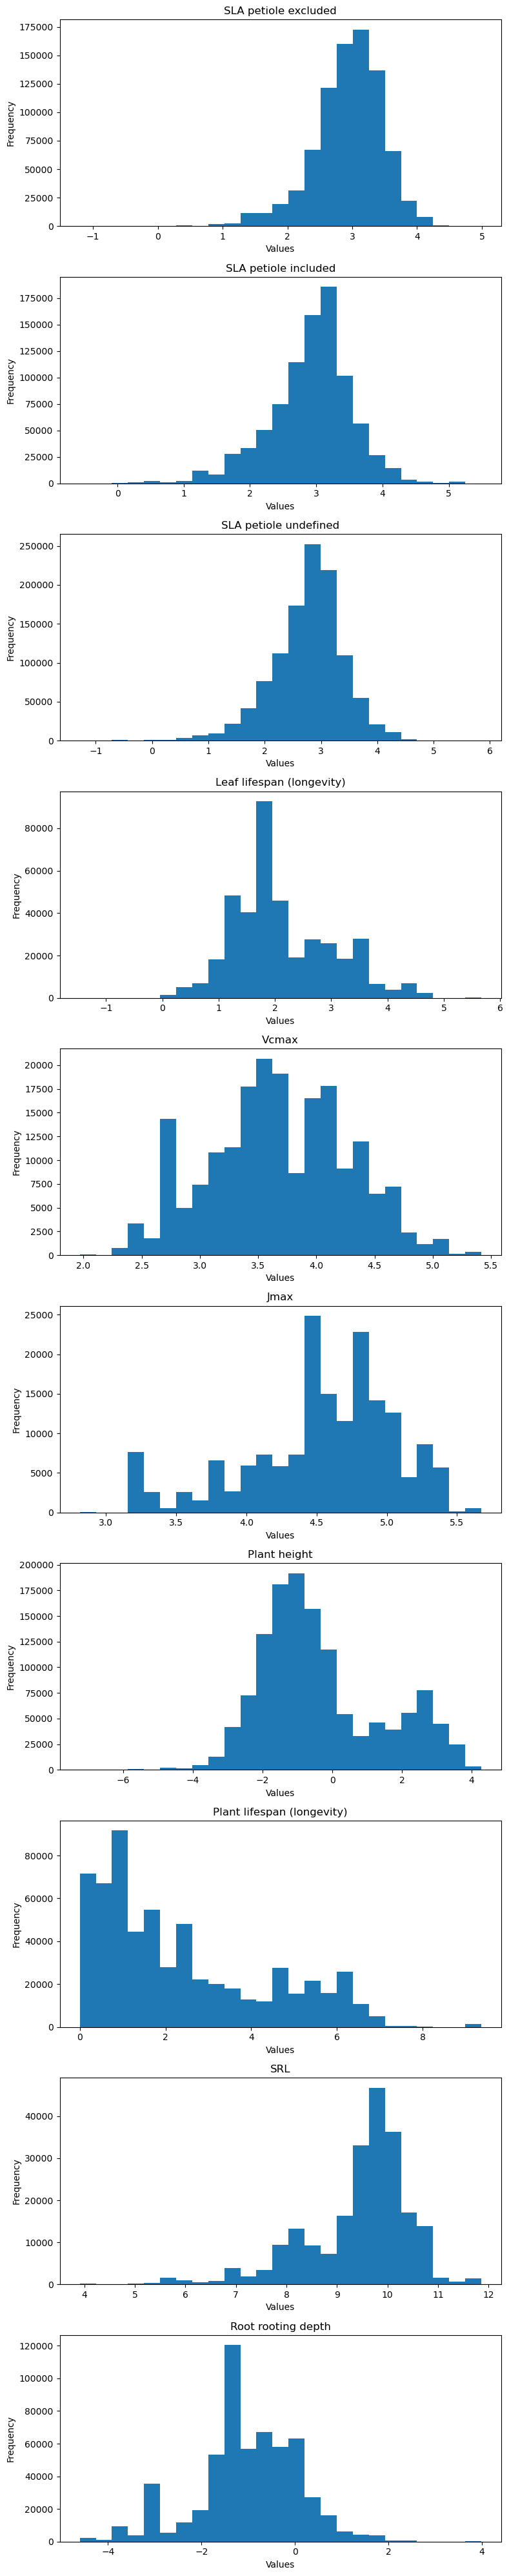

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
columns_to_plot = sPlot_TRY.columns[6:-3]  # Select columns 2-8 (0-based indexing)
num_plots = len(columns_to_plot)

fig, axs = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    sPlot_TRY[column].plot(kind='hist', ax=ax, bins=25)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [133]:
sPlot_TRY.head()

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover,SLA petiole excluded,SLA petiole included,SLA petiole undefined,Leaf lifespan (longevity),Vcmax,Jmax,Plant height,Plant lifespan (longevity),SRL,Root rooting depth,Releve_area,Latitude,Longitude
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778,NaN,NaN,2.733625,NaN,NaN,NaN,-2.746117,NaN,NaN,NaN,NaN,62.420000,-154.180000
1,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462,NaN,NaN,2.733625,NaN,NaN,NaN,-2.746117,NaN,NaN,NaN,NaN,62.420000,-154.180000
2,18,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.047619,NaN,NaN,2.733625,NaN,NaN,NaN,-2.746117,NaN,NaN,NaN,NaN,62.420000,-154.180000
3,713,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.011173,NaN,NaN,2.733625,NaN,NaN,NaN,-2.746117,NaN,NaN,NaN,100.0,69.851405,-156.016865
4,713,Cassiope tetragona,Cassiope tetragona [s. tetragona],8.0,CoverPerc,0.044693,1.875041,NaN,1.786321,3.693563,NaN,NaN,-2.452815,4.304065,NaN,-2.283436,100.0,69.851405,-156.016865


In [138]:
# Group the dataframe by the plot number
grouped_sPlot_TRY = sPlot_TRY.groupby('PlotObservationID')

results = []

# Iterate over each plot
for plot, group in grouped_sPlot_TRY:
    traits = group.drop(['PlotObservationID', 'Species', 'Original_species', 
                         'Original_abundance', 'Abundance_scale', 'Relative_cover', 
                        'Releve_area', 'Latitude', 'Longitude'], axis=1)  # Drop 'plot' and 'cover' columns
    covers = group['Relative_cover']
    
    # Calculate the weighted mean of each trait
    # We divide by convers.sum() since the relative covers in each plot are not always exactly 1.
    weighted_means = traits.mul(covers, axis=0).sum() / covers.sum()
    
    # Store the results as a dictionary
    result = {'PlotObservationID': plot}
    result.update(weighted_means)
    results.append(result)

# Create a new dataframe from the results
sPlot_cwm = pd.DataFrame(results)


In [140]:
sPlot_cwm.replace(0, np.nan, inplace=True)

In [141]:
sPlot_cwm.head()

,PlotObservationID,SLA petiole excluded,SLA petiole included,SLA petiole undefined,Leaf lifespan (longevity),Vcmax,Jmax,Plant height,Plant lifespan (longevity),SRL,Root rooting depth
0,16,NaN,NaN,2.733625,NaN,NaN,NaN,-2.746117,NaN,NaN,NaN
1,17,NaN,NaN,2.733625,NaN,NaN,NaN,-2.746117,NaN,NaN,NaN
2,18,NaN,NaN,2.733625,NaN,NaN,NaN,-2.746117,NaN,NaN,NaN
3,20,NaN,NaN,NaN,NaN,NaN,NaN,-2.659260,NaN,NaN,NaN
4,22,NaN,NaN,0.280880,NaN,NaN,NaN,-2.743812,0.069315,NaN,-0.059405


In [142]:
# Add location

sPlot_cwm = pd.merge(sPlot_cwm, loc, 
                    left_on= ['PlotObservationID'],
                    right_on= ['PlotObservationID'], 
                    how='inner')


In [143]:
sPlot_cwm

,PlotObservationID,SLA petiole excluded,SLA petiole included,SLA petiole undefined,Leaf lifespan (longevity),Vcmax,Jmax,Plant height,Plant lifespan (longevity),SRL,Root rooting depth,Releve_area,Latitude,Longitude
0,16,NaN,NaN,2.733625,NaN,NaN,NaN,-2.746117,NaN,NaN,NaN,NaN,62.420000,-154.180000
1,17,NaN,NaN,2.733625,NaN,NaN,NaN,-2.746117,NaN,NaN,NaN,NaN,62.420000,-154.180000
2,18,NaN,NaN,2.733625,NaN,NaN,NaN,-2.746117,NaN,NaN,NaN,NaN,62.420000,-154.180000
3,20,NaN,NaN,NaN,NaN,NaN,NaN,-2.659260,NaN,NaN,NaN,NaN,62.420000,-154.180000
4,22,NaN,NaN,0.280880,NaN,NaN,NaN,-2.743812,0.069315,NaN,-0.059405,NaN,62.420000,-154.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93661,1126749,2.267439,1.981487,2.404031,1.745461,2.759521,NaN,-1.663301,0.231049,7.502385,-0.923370,4.0,56.287870,27.273862
93662,1126761,2.717779,2.800060,2.947478,2.008084,2.960019,3.927705,-1.787653,0.071528,8.065116,-0.631956,4.0,56.939965,23.598014
93663,1126769,2.752282,2.801826,2.940007,2.088481,2.992393,3.970663,-1.723200,0.145115,8.152443,-0.658575,4.0,56.939965,23.598014
93664,1126774,2.236322,2.574763,2.518091,0.188797,0.099567,0.124812,-0.777063,0.532317,NaN,-0.278419,4.0,57.248222,22.147667


In [144]:
sPlot_cwm.to_csv("/net/scratch/swolf/GDVM/sPlot_gdvm/sPlotOpen_TRY23608_cwm.csv", index=False)


In [35]:
df_groups = group_grid_data(sPlot_TRY, 'Longitude', 'Latitude', deg=2.0)

In [25]:
#sPlot_TRY['grid_lat'] = sPlot_TRY['Latitude'].apply(lambda x: round(x / 2) * 2)

In [26]:
#sPlot_TRY['grid_lon'] = sPlot_TRY['Longitude'].apply(lambda y: round(y / 2) * 2)

In [36]:
sPlot_TRY['grid_cell'] = sPlot_TRY['x_bin'].astype(str) + '_' + sPlot_TRY['y_bin'].astype(str)

In [37]:
sPlot_TRY.head()

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover,X1080,X11,X13,X138,...,X6,X78,X95,Releve_area,Latitude,Longitude,x_bin,y_bin,Coords,grid_cell
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778,5323.593548,13.288268,459.744335,167.314329,...,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000,-155.0,63.0,"(63.0, -155.0)",-155.0_63.0
1,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462,5323.593548,13.288268,459.744335,167.314329,...,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000,-155.0,63.0,"(63.0, -155.0)",-155.0_63.0
2,18,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.047619,5323.593548,13.288268,459.744335,167.314329,...,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000,-155.0,63.0,"(63.0, -155.0)",-155.0_63.0
3,713,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.011173,5323.593548,13.288268,459.744335,167.314329,...,0.203998,-2.160506,94.683061,100.0,69.851405,-156.016865,-157.0,69.0,"(69.0, -157.0)",-157.0_69.0
4,713,Cassiope tetragona,Cassiope tetragona [s. tetragona],8.0,CoverPerc,0.044693,991.623552,6.427231,523.751537,41.326091,...,0.040477,-5.866897,74.753748,100.0,69.851405,-156.016865,-157.0,69.0,"(69.0, -157.0)",-157.0_69.0


Group the DataFrame by grid cell and species, and calculate the sum of the relative cover for each species within each grid cell


In [38]:
grouped_df = sPlot_TRY.groupby(['grid_cell', 'Species'])['Relative_cover'].sum().reset_index()

In [39]:
grouped_df.head()

,grid_cell,Species,Relative_cover
0,-1.0_11.0,Acacia sieberiana,0.018868
1,-1.0_11.0,Achyranthes aspera,0.018868
2,-1.0_11.0,Acroceras amplectens,0.018868
3,-1.0_11.0,Alternanthera sessilis,0.018868
4,-1.0_11.0,Andropogon gayanus,0.018868


Calculate the total relative cover of all species within each grid cell

In [41]:
total_relative_cover = grouped_df.groupby('grid_cell')['Relative_cover'].sum().reset_index()

In [42]:
total_relative_cover.head()

,grid_cell,Relative_cover
0,-1.0_11.0,0.886792
1,-1.0_13.0,78.184092
2,-1.0_15.0,519.202654
3,-1.0_39.0,44.768528
4,-1.0_41.0,152.669531


In [43]:
# Merge the total_relative_cover back into the grouped_df
grouped_df = pd.merge(grouped_df, total_relative_cover, on='grid_cell', suffixes=('', '_total'))

In [44]:
grouped_df.head()

,grid_cell,Species,Relative_cover,Relative_cover_total
0,-1.0_11.0,Acacia sieberiana,0.018868,0.886792
1,-1.0_11.0,Achyranthes aspera,0.018868,0.886792
2,-1.0_11.0,Acroceras amplectens,0.018868,0.886792
3,-1.0_11.0,Alternanthera sessilis,0.018868,0.886792
4,-1.0_11.0,Andropogon gayanus,0.018868,0.886792


In [45]:
# Calculate the new relative cover for each species within each grid cell
grouped_df['Relative_cover_agg'] = grouped_df['Relative_cover'] / grouped_df['Relative_cover_total']

# Drop unnecessary columns
grouped_df = grouped_df.drop(['Relative_cover', 'Relative_cover_total'], axis=1)


In [46]:
grouped_df.head()

,grid_cell,Species,Relative_cover_agg
0,-1.0_11.0,Acacia sieberiana,0.021277
1,-1.0_11.0,Achyranthes aspera,0.021277
2,-1.0_11.0,Acroceras amplectens,0.021277
3,-1.0_11.0,Alternanthera sessilis,0.021277
4,-1.0_11.0,Andropogon gayanus,0.021277


In [ ]:
#grouped_df.to_csv('your_result.csv', index=False)

### Prepare trait and abundance matrices

In [50]:
trait = sPlot_TRY.drop(sPlot_TRY.columns[[0, 2, 3, 4, 5, -1, -2, -3, -4, -5, -6]],axis = 1)


In [51]:
# remove the last column
trait = trait.drop(trait.columns[-1], axis=1)

In [52]:
trait = trait.drop_duplicates()

In [53]:
trait = trait.set_index('Species')
trait.head()

,X1080,X11,X13,X138,X14,X144,X145,X146,X15,X163,...,X3114,X3120,X4,X46,X47,X50,X55,X6,X78,X95
Species,,,,,,,,,,,,,,,,,,,,,
Festuca brachyphylla,5323.593548,13.288268,459.744335,167.314329,16.858434,43.535250,0.141263,27.219596,3.018731,0.012387,...,63.057953,2.837803,0.336999,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061
Cassiope tetragona,991.623552,6.427231,523.751537,41.326091,11.588464,5.938858,0.095616,49.775980,1.033273,0.005336,...,8.447938,2.982561,0.618558,0.366573,0.327732,2.124601,1.717482,0.040477,-5.866897,74.753748
Salix reticulata,1169.160399,9.808099,525.117198,475.116512,20.174198,39.636465,1.228794,23.213307,1.300761,0.058706,...,290.888122,2.830872,0.466361,0.167995,0.369378,2.110325,21.946125,0.038708,-5.319677,73.339352
Saxifraga nelsoniana,3334.391547,51.949018,409.662224,951.191740,24.783290,29.149376,2.413856,20.104725,1.679199,0.328612,...,576.549452,10.997896,0.600706,0.298636,0.106167,0.572803,39.990799,0.183850,-2.910440,87.826246
Vaccinium uliginosum,3208.360870,13.654154,520.435108,13.629597,19.780911,13.372017,0.672049,31.905826,1.025214,0.016325,...,142.510034,2.696189,0.306338,0.181623,0.407389,1.504506,6.502814,0.146844,-4.038124,59.583991


In [54]:
trait.isnull().values.any()

False

In [55]:
abun = grouped_df

In [59]:
abun

,grid_cell,Species,Relative_cover_agg
0,-1.0_11.0,Acacia sieberiana,0.021277
1,-1.0_11.0,Achyranthes aspera,0.021277
2,-1.0_11.0,Acroceras amplectens,0.021277
3,-1.0_11.0,Alternanthera sessilis,0.021277
4,-1.0_11.0,Andropogon gayanus,0.021277
...,...,...,...
197343,99.0_7.0,Marsilea minuta,0.346307
197344,99.0_7.0,Najas minor,0.049599
197345,99.0_7.0,Oryza sativa,0.583346
197346,99.0_9.0,Hydrocera triflora,0.050000


In [57]:
check = abun.groupby(['grid_cell'], as_index=False).sum()

/tmp/ipykernel_1346701/3696746241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  check = abun.groupby(['grid_cell'], as_index=False).sum()


In [58]:
check

,grid_cell,Relative_cover_agg
0,-1.0_11.0,1.0
1,-1.0_13.0,1.0
2,-1.0_15.0,1.0
3,-1.0_39.0,1.0
4,-1.0_41.0,1.0
...,...,...
1085,99.0_43.0,1.0
1086,99.0_45.0,1.0
1087,99.0_57.0,1.0
1088,99.0_7.0,1.0


In [60]:
check['Relative_cover_agg'].max()

1.0000000000000002

In [61]:
check['Relative_cover_agg'].min()

0.9999999999999998

In [62]:
abun = abun.pivot(index='grid_cell', columns='Species', values="Relative_cover_agg")

In [63]:
abun.head()

Species,Aaronsohnia pubescens,Abarema adenophora,Abarema adenophorum,Abarema barbouriana,Abarema jupunba,Abarema laeta,Abarema langsdorffii,Abarema macradenia,Abarema racemiflora,Abelia biflora,...,Zygophyllum fabago,Zygophyllum kaschgaricum,Zygophyllum leptopetalum,Zygophyllum prismatocarpum,Zygophyllum pterocarpum,Zygophyllum rosowii,Zygophyllum sonderi,Zygophyllum spinosum,Zygophyllum tenue,Zygophyllum xanthoxylum
grid_cell,,,,,,,,,,,,,,,,,,,,,
-1.0_11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.0_13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.0_15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.0_39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.0_41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove plots with less than 20 species.

In [64]:
abun.dropna(axis = 0, inplace = True, thresh=20)

In [65]:
abun.shape

(934, 20807)

Drop columns with all NaN

In [66]:
abun.dropna(axis=1, how='all', inplace = True)

Drop all rows with all NaN

In [67]:
abun.dropna(how='all', inplace = True)

In [68]:
abun.shape

(934, 20751)

In [69]:
trait = trait.reindex(abun.T.index)

In [70]:
trait.shape

(20751, 33)

In [71]:
trait.isnull().values.any()

False

In [72]:
trait.index.tolist() == abun.columns.tolist()


True